## Import Dependencies and build the basic URL for the OpenWeatherMap

In [1]:
# Import the dependecies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

# Import the request library and the Weather API key
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 

import time
from datetime import datetime

In [2]:
# Build the basics URL for the OpenWeatherMap

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## Generate random list of cities using latitudes and longitudes

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude cobination.

for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, add to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

637

## Initialize an Empty List and Counters

In [5]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning of Data Retrieval")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

Beginning of Data Retrieval
-----------------------------


## Loop Through the List of Cities and Build the City URL

In [6]:
# Loop through all the cities in our list.

for i, city in enumerate(cities):
    
    # Group cities in setf of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
          
    # Add 1 to the record count
    record_count += 1

    # Run and API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
          
        # Parse out the required data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
          
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
          
        # Append the city information into city_data list
        city_data.append({'City' : city.title(),
                          'Lat' : city_lat,
                          'Lng' : city_lng,
                          'Max Temp' : city_max_temp,
                          'Humidity' : city_humidity,
                          'Cloudiness' : city_clouds,
                          'Wind Speed' : city_wind,
                          'Country' : city_country,
                          'Date' : city_date})
    
    # If an error is experienced skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")    

Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | sisimiut
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | matay
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | funadhoo
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | samarai
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | ambilobe
Processing Record 17 of Set 1 | usinsk
Processing Record 18 of Set 1 | evanston
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 | baturaja
Processing Record 2

Processing Record 41 of Set 4 | gap
Processing Record 42 of Set 4 | ocampo
Processing Record 43 of Set 4 | praya
Processing Record 44 of Set 4 | nokaneng
Processing Record 45 of Set 4 | bethel
Processing Record 46 of Set 4 | panjab
Processing Record 47 of Set 4 | bolivar
Processing Record 48 of Set 4 | kieta
Processing Record 49 of Set 4 | burica
City not found. Skipping...
Processing Record 50 of Set 4 | acapulco
Processing Record 1 of Set 5 | taltal
Processing Record 2 of Set 5 | dharchula
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | buchach
Processing Record 7 of Set 5 | margate
Processing Record 8 of Set 5 | mitsamiouli
Processing Record 9 of Set 5 | neyshabur
Processing Record 10 of Set 5 | plonsk
Processing Record 11 of Set 5 | dzheguta
Processing Record 12 of Set 5 | santa cruz
Processing Record 13 of Set 5 | ghatanji
Processing Record 14 of Set 5 | samusu
City not found. 

Processing Record 29 of Set 8 | tonj
Processing Record 30 of Set 8 | villarrica
Processing Record 31 of Set 8 | yanan
City not found. Skipping...
Processing Record 32 of Set 8 | saint george
Processing Record 33 of Set 8 | borama
City not found. Skipping...
Processing Record 34 of Set 8 | manado
Processing Record 35 of Set 8 | bereda
Processing Record 36 of Set 8 | registro
Processing Record 37 of Set 8 | banyo
Processing Record 38 of Set 8 | rio grande
Processing Record 39 of Set 8 | kudahuvadhoo
Processing Record 40 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 41 of Set 8 | jumla
Processing Record 42 of Set 8 | mount gambier
Processing Record 43 of Set 8 | souillac
Processing Record 44 of Set 8 | kungurtug
Processing Record 45 of Set 8 | ileza
Processing Record 46 of Set 8 | todos santos
Processing Record 47 of Set 8 | kununurra
Processing Record 48 of Set 8 | iranshahr
Processing Record 49 of Set 8 | cayenne
Processing Record 50 of Set 8 | itoman
Processing Reco

Processing Record 19 of Set 12 | azrow
City not found. Skipping...
Processing Record 20 of Set 12 | amurzet
Processing Record 21 of Set 12 | falam
Processing Record 22 of Set 12 | warqla
City not found. Skipping...
Processing Record 23 of Set 12 | hihifo
City not found. Skipping...
Processing Record 24 of Set 12 | benemerito de las americas
Processing Record 25 of Set 12 | doka
Processing Record 26 of Set 12 | marawi
Processing Record 27 of Set 12 | cap-chat
Processing Record 28 of Set 12 | rolla
Processing Record 29 of Set 12 | ixtapa
Processing Record 30 of Set 12 | batagay
Processing Record 31 of Set 12 | soyo
Processing Record 32 of Set 12 | havre-saint-pierre
Processing Record 33 of Set 12 | pinsk
Processing Record 34 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 35 of Set 12 | port-gentil
Processing Record 36 of Set 12 | tacoronte
Processing Record 37 of Set 12 | honiara
Processing Record 38 of Set 12 | starobesheve
Processing Record 39 of Set 12 | vsevolodo-v

In [7]:
len(city_data)

593

## Create a DataFrame of City Weather Data

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-8.72,59,98,6.98,GL,2022-11-09 22:34:04
1,Sisimiut,66.9395,-53.6735,10.53,67,100,11.92,GL,2022-11-09 22:31:10
2,Punta Arenas,-53.1500,-70.9167,51.12,37,40,27.63,CL,2022-11-09 22:31:43
3,Talnakh,69.4865,88.3972,-8.32,100,100,5.75,RU,2022-11-09 22:34:05
4,Matay,28.4190,30.7792,63.64,65,0,7.27,EG,2022-11-09 22:34:06
5,Butaritari,3.0707,172.7902,81.41,76,100,21.79,KI,2022-11-09 22:34:06
6,Nikolskoye,59.7035,30.7861,49.91,94,100,8.34,RU,2022-11-09 22:34:07
7,Funadhoo,6.1500,73.2667,80.56,76,92,4.52,MV,2022-11-09 22:34:07
8,Tuktoyaktuk,69.4541,-133.0374,12.20,92,75,8.05,CA,2022-11-09 22:34:08
9,Ushuaia,-54.8000,-68.3000,44.26,61,40,18.41,AR,2022-11-09 22:34:08


In [9]:
# Redorder columns

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-11-09 22:34:04,77.4840,-69.3632,-8.72,59,98,6.98
1,Sisimiut,GL,2022-11-09 22:31:10,66.9395,-53.6735,10.53,67,100,11.92
2,Punta Arenas,CL,2022-11-09 22:31:43,-53.1500,-70.9167,51.12,37,40,27.63
3,Talnakh,RU,2022-11-09 22:34:05,69.4865,88.3972,-8.32,100,100,5.75
4,Matay,EG,2022-11-09 22:34:06,28.4190,30.7792,63.64,65,0,7.27
5,Butaritari,KI,2022-11-09 22:34:06,3.0707,172.7902,81.41,76,100,21.79
6,Nikolskoye,RU,2022-11-09 22:34:07,59.7035,30.7861,49.91,94,100,8.34
7,Funadhoo,MV,2022-11-09 22:34:07,6.1500,73.2667,80.56,76,92,4.52
8,Tuktoyaktuk,CA,2022-11-09 22:34:08,69.4541,-133.0374,12.20,92,75,8.05
9,Ushuaia,AR,2022-11-09 22:34:08,-54.8000,-68.3000,44.26,61,40,18.41


In [10]:
# Create the output file (csv).

output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a csv.

city_data_df.to_csv(output_data_file, index_label='City_ID')

# Plot Weather Parameter against latitude

In [11]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

## Plot Latitude vs. Temperature

In [12]:
# Import time module

import time

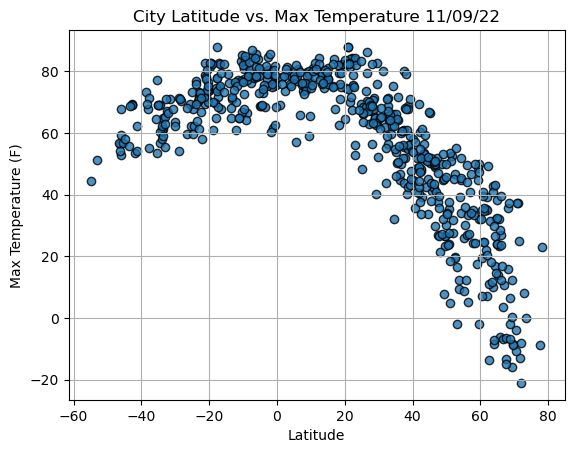

In [13]:
# Build the scatter plot for latitude vs max temperature.

plt.scatter(lats, 
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

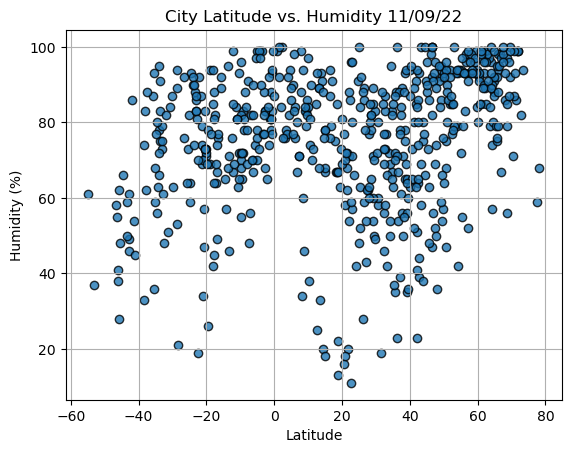

In [14]:
# Build the scatter plot for latitude vs humidity.

plt.scatter(lats, 
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

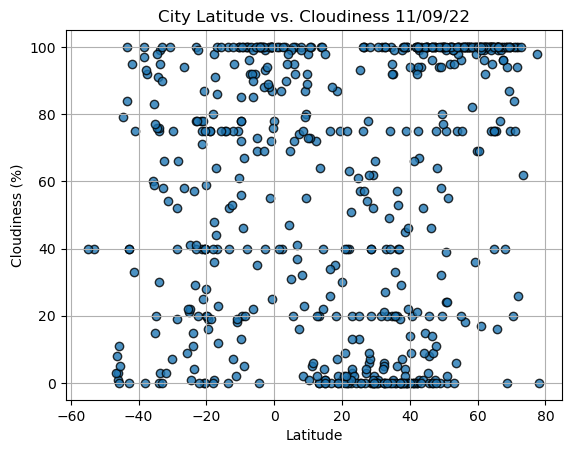

In [15]:
# Build the scatter plot for latitude vs cloudiness.

plt.scatter(lats, 
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

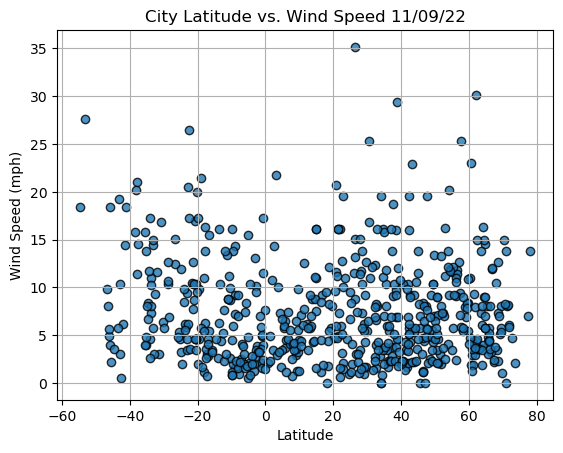

In [16]:
# Build the scatter plot for latitude vs wind speed.

plt.scatter(lats, 
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()

## Create a Linear Regression Function

In [17]:
# Import linregress
from scipy.stats import linregress

In [47]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and the intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create the scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

## Create the Hemisphere DataFrames

In [48]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

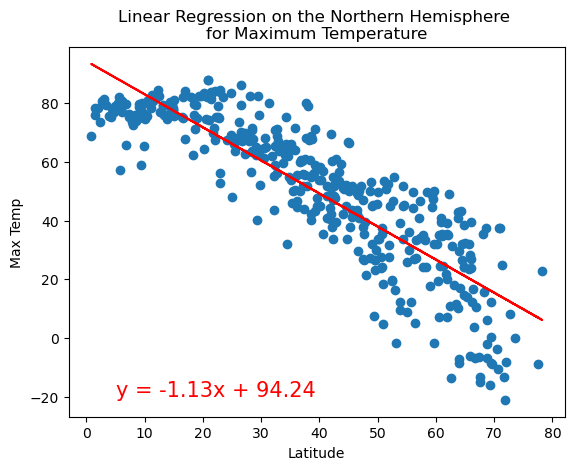

In [67]:
# Linear regression for the northern hemisphere.

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp', (5,-20))

## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

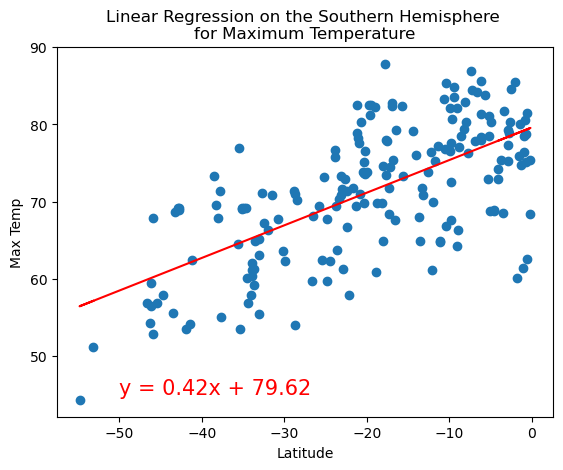

In [64]:
# Linear regression for the southern hemisphere.

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp', (-50,45))

## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

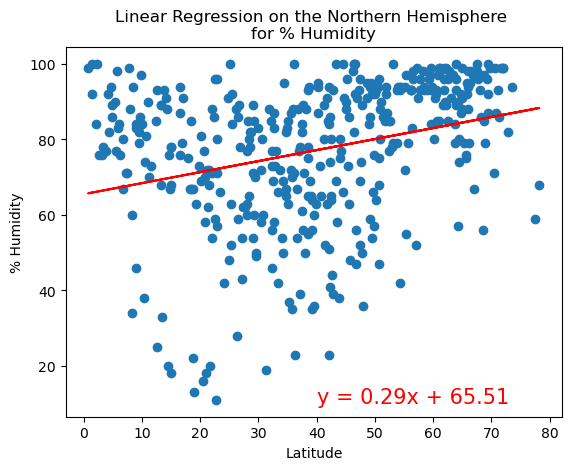

In [63]:
# Linear regression for the northern hemisphere.

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                       '% Humidity', (40,10))

## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

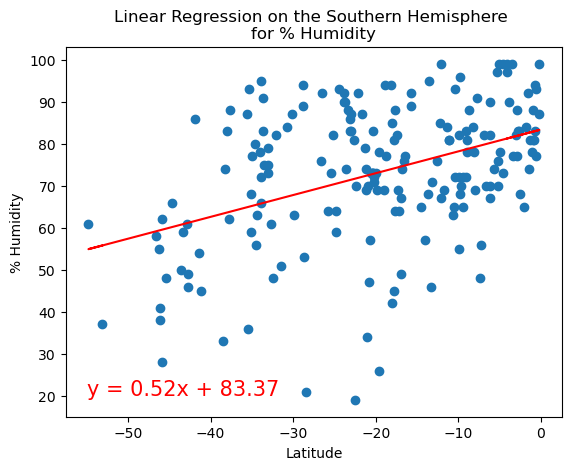

In [73]:
# Linear regression for the southern hemisphere.

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor % Humidity', 
                       '% Humidity', (-55,20))

## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

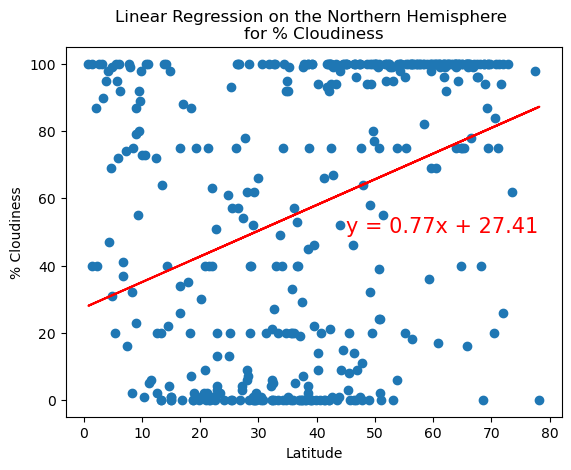

In [76]:
# Linear regression for the northern hemisphere.

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness', (45,50))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

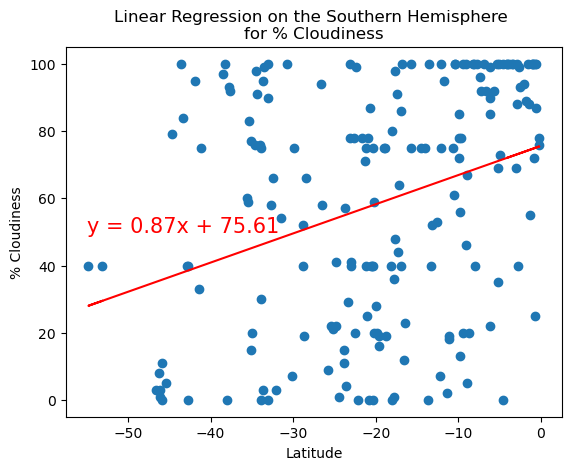

In [78]:
# Linear regression for the southern hemisphere.

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness', (-55,50))

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

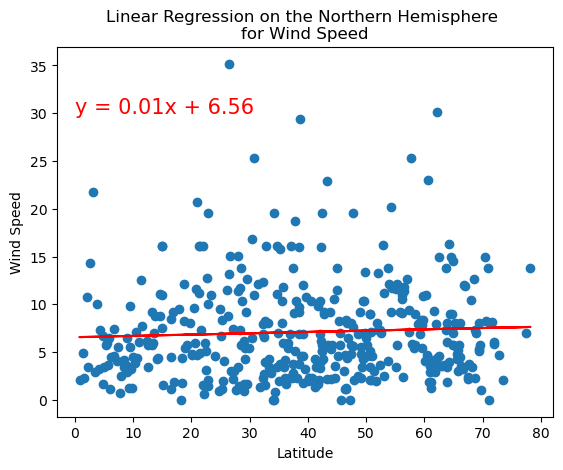

In [82]:
# Linear regression for the northern hemisphere.

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor Wind Speed',
                       'Wind Speed', (0,30))

## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

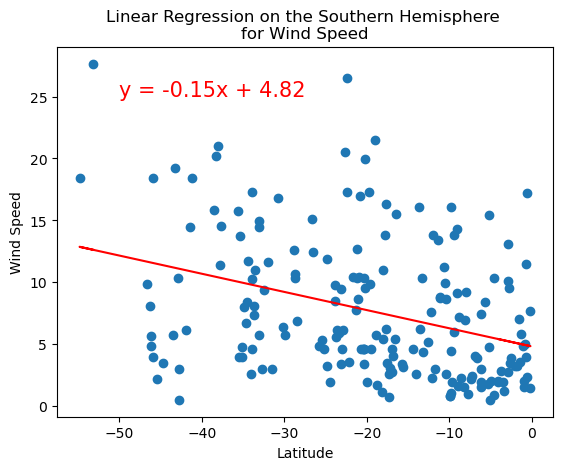

In [84]:
# Linear regression for the southern hemisphere.

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor Wind Speed',
                       'Wind Speed', (-50,25))